<a href="https://colab.research.google.com/github/danieldrako/analisisMonterryPalabras/blob/main/exploracionVisualPalabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import pandas as pd

In [6]:
compras_df = pd.read_csv('/data/clean_compras.csv')

In [7]:
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,110741,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",APS931217911,MTY7059-158003-5907,ORDEN DE COMPRA 7356,SUMINISTRO DE MATERIAL DE PAPELERIA PARA LAS D...,TR,1021640.0,2021-12-30,8885.58,GASTOS VARIOS
1,110751,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",PTO900402RV5,B24553-158003-5592,ORDEN DE COMPRA 7279,SUMINISTRO DE PILAS ALCALINAS AA Y AAA PARA LO...,TR,1021489.0,2021-12-10,17774.31,GASTOS VARIOS
2,110751,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",PTO900402RV5,B24653-158003-5420,ORDEN DE COMPRA 7297,SUMINISTRO DE MATERIALES PARA LA DIR. DE IMAGE...,TR,1021489.0,2021-12-10,21385.84,GASTOS VARIOS
3,110751,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",PTO900402RV5,B24711-158003-5881,ORDEN DE COMPRA 7373,SUMINISTRO DE MATERIAL REQUERIDO PARA LA REPAR...,TR,1021580.0,2021-12-17,23641.61,GASTOS VARIOS
4,110751,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",PTO900402RV5,B24753-158003-5848,ORDEN DE COMPRA 7395,SUMINISTRO DE MATERIAL PARA LA FABRICACION DE ...,TR,1021580.0,2021-12-17,9014.36,GASTOS VARIOS


### Visión General

In [8]:
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACT-NUE-FO', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [9]:
# se ha afectado el tipo de datos en la exportación
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACT-NUE-FO      object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO-#OP         float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [10]:
## Trabajando sobre las variables numéricas
compras_df.describe()

,NUM BEN,FDO-#OP,IMPORTE
count,1134.000000,1.134000e+03,1.134000e+03
mean,209906.486772,1.275984e+08,4.473905e+05
std,66097.870216,1.576289e+08,3.762533e+06
min,110741.000000,1.021425e+06,2.364000e+01
25%,203013.000000,1.021566e+06,5.050100e+03
50%,203016.000000,1.106971e+06,2.245406e+04
75%,214872.000000,3.190005e+08,8.619238e+04
max,370012.000000,6.040001e+08,8.299122e+07


In [11]:
compras_df = compras_df[['BENEFICIARIO', 'FACT-NUE-FO', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET']]

### Análisis unidimensional de las variables

In [12]:
## conteo de ocuerrencia 

compras_df['SHEET'].value_counts()

GASTOS VARIOS     569
SERV PERS         534
COMUNIC            26
GTOS REPRESENT      5
Name: SHEET, dtype: int64

In [13]:
compras_df['CONCEPTO'].value_counts()

CAJA CHICA NOVIEMBRE 2021                                                                               11
DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA SEGUNDA QUINCENA DEL MES 12 Y AÑO 2021                      11
DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA PRIMERA QUINCENA DEL MES 12 Y AÑO 2021                      11
DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA SEGUNDA QUINCENA DEL MES 11 Y AÑO 2021                      11
PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. JAIME RODRIGUEZ MARTINEZ NOMINA 1574                        10
                                                                                                        ..
DESCUENTO JUDICIAL MERCANTIL - HORACIO SALAZAR GONZALEZ 110992 - 24/2021                                 1
DESCUENTO JUDICIAL MERCANTIL - LUIS MARTIN PUGA ARROYO 24873 - 24/2021                                   1
DESCUENTO JUDICIAL MERCANTIL - MARIA DOLORES CASTILLO OLIVAS 14518 - 24/2021                             1
DESCUENTO JUDICIAL MERCANTIL - ORALIA

In [14]:
## cantidad de observaciones de conceptos 
len(compras_df['CONCEPTO'].value_counts())

721

In [15]:
#primeros 10 pagos que ha hecho cada provedor
compras_df['BENEFICIARIO'].value_counts()[0:10]

HISA FARMACEUTICA, S.A. DE C.V.                          31
S.I.M.E.P.R.O.D.E.                                       31
SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL    21
IMPRENTA PERCHES, S.A. DE C.V.                           21
GASOLINERA NUEVO LEON, S.A. DE C.V.                      19
SERVICIO GAS LINCOLN, S.A. DE C.V.                       17
CFE SUMINISTRADOR DE SERVICIOS BASICOS                   16
GONZALEZ RAMIREZ CARLOS ADRIAN                           16
GS GAS Q, S.A. DE C.V.                                   16
MUNICIPIO DE LA CIUDAD DE MONTERREY                      15
Name: BENEFICIARIO, dtype: int64

In [16]:
## en porcentaje 
compras_df['BENEFICIARIO'].value_counts(normalize = True)[0:10]

HISA FARMACEUTICA, S.A. DE C.V.                          0.027337
S.I.M.E.P.R.O.D.E.                                       0.027337
SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL    0.018519
IMPRENTA PERCHES, S.A. DE C.V.                           0.018519
GASOLINERA NUEVO LEON, S.A. DE C.V.                      0.016755
SERVICIO GAS LINCOLN, S.A. DE C.V.                       0.014991
CFE SUMINISTRADOR DE SERVICIOS BASICOS                   0.014109
GONZALEZ RAMIREZ CARLOS ADRIAN                           0.014109
GS GAS Q, S.A. DE C.V.                                   0.014109
MUNICIPIO DE LA CIUDAD DE MONTERREY                      0.013228
Name: BENEFICIARIO, dtype: float64

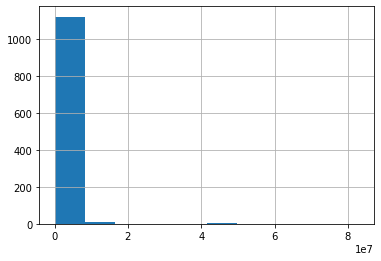

In [17]:
## Histograma
compras_df['IMPORTE'].hist()

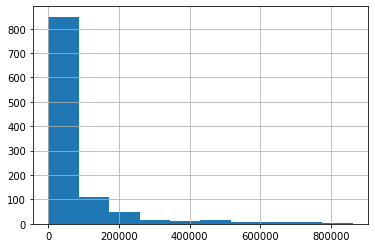

In [18]:
## Compras menores a un cuantil
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

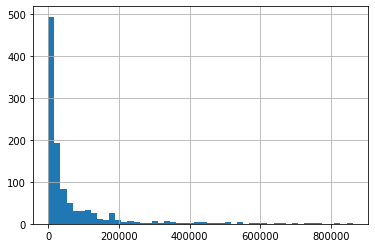

In [19]:
## con 50 separaciones
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [20]:
## conceptos menores a un cuantil 5% o superior 
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7059-158003-5907,ORDEN DE COMPRA 7356,SUMINISTRO DE MATERIAL DE PAPELERIA PARA LAS D...,TR,1021640.0,2021-12-30,8885.58,GASTOS VARIOS
1,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24553-158003-5592,ORDEN DE COMPRA 7279,SUMINISTRO DE PILAS ALCALINAS AA Y AAA PARA LO...,TR,1021489.0,2021-12-10,17774.31,GASTOS VARIOS
2,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24653-158003-5420,ORDEN DE COMPRA 7297,SUMINISTRO DE MATERIALES PARA LA DIR. DE IMAGE...,TR,1021489.0,2021-12-10,21385.84,GASTOS VARIOS
3,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24711-158003-5881,ORDEN DE COMPRA 7373,SUMINISTRO DE MATERIAL REQUERIDO PARA LA REPAR...,TR,1021580.0,2021-12-17,23641.61,GASTOS VARIOS
4,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24753-158003-5848,ORDEN DE COMPRA 7395,SUMINISTRO DE MATERIAL PARA LA FABRICACION DE ...,TR,1021580.0,2021-12-17,9014.36,GASTOS VARIOS


### Análisis multidimensional de las variables

In [40]:
## Provedores con mayor carga
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

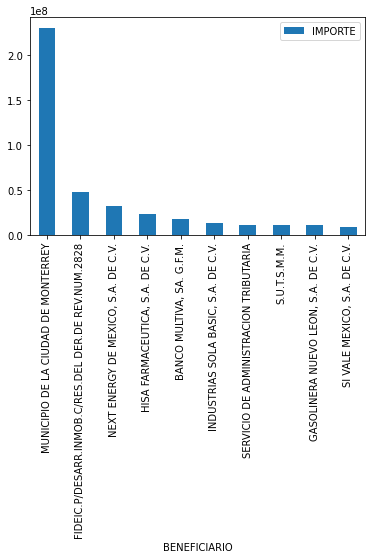

In [41]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar'
                                                                        ,x='BENEFICIARIO', y='IMPORTE')
                                                             

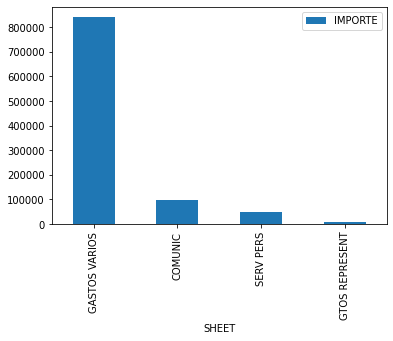

In [42]:
## Gasto promedio por hoja

mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar'
                                                                        ,x='SHEET', y='IMPORTE')

In [43]:
##Tipos de gastos

mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
1,GASTOS VARIOS,841891.206837
0,COMUNIC,97668.258846
3,SERV PERS,48157.958352
2,GTOS REPRESENT,9792.000000


In [44]:
suma_importe_fecha=compras_df.groupby('FECHA').sum()['IMPORTE']
suma_importe_fecha

FECHA
2021-12-01    4.823413e+05
2021-12-02    6.033052e+05
2021-12-03    8.431171e+06
2021-12-06    1.447375e+07
2021-12-07    7.448659e+06
2021-12-08    1.456263e+06
2021-12-09    2.272827e+06
2021-12-10    1.129222e+07
2021-12-13    2.940510e+06
2021-12-14    2.104915e+07
2021-12-15    4.507645e+06
2021-12-16    2.437798e+07
2021-12-17    1.960480e+08
2021-12-20    8.194264e+07
2021-12-21    2.182650e+06
2021-12-22    1.053072e+06
2021-12-23    4.540482e+05
2021-12-24    6.868889e+06
2021-12-27    4.794464e+07
2021-12-28    1.061467e+07
2021-12-29    3.742221e+05
2021-12-30    2.534912e+07
2021-12-31    3.517302e+07
Name: IMPORTE, dtype: float64

In [45]:
## Gastos varios
compras_gastos_df = compras_df[compras_df['SHEET']=='GASTOS VARIOS']
compras_gastos_df

,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7059-158003-5907,ORDEN DE COMPRA 7356,SUMINISTRO DE MATERIAL DE PAPELERIA PARA LAS D...,TR,1021640.0,2021-12-30,8885.58,GASTOS VARIOS
1,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24553-158003-5592,ORDEN DE COMPRA 7279,SUMINISTRO DE PILAS ALCALINAS AA Y AAA PARA LO...,TR,1021489.0,2021-12-10,17774.31,GASTOS VARIOS
2,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24653-158003-5420,ORDEN DE COMPRA 7297,SUMINISTRO DE MATERIALES PARA LA DIR. DE IMAGE...,TR,1021489.0,2021-12-10,21385.84,GASTOS VARIOS
3,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24711-158003-5881,ORDEN DE COMPRA 7373,SUMINISTRO DE MATERIAL REQUERIDO PARA LA REPAR...,TR,1021580.0,2021-12-17,23641.61,GASTOS VARIOS
4,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24753-158003-5848,ORDEN DE COMPRA 7395,SUMINISTRO DE MATERIAL PARA LA FABRICACION DE ...,TR,1021580.0,2021-12-17,9014.36,GASTOS VARIOS
...,...,...,...,...,...,...,...,...,...
564,"GS GAS Q, S.A. DE C.V.",BPLGK 78473091-158003-5928,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 08 AL 14...,TR,1021620.0,2021-12-24,337446.11,GASTOS VARIOS
565,"GS GAS Q, S.A. DE C.V.",BPLGK 78473092-158003-5929,SAD-627-2020,CONSUMO DE DIESEL DE LA SEMANA DEL 08 AL 14 ...,TR,1021620.0,2021-12-24,109684.73,GASTOS VARIOS
566,"GS GAS Q, S.A. DE C.V.",BPLGK 78472877-158003-5152,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 22 AL 26...,TR,1021628.0,2021-12-28,307980.22,GASTOS VARIOS
567,"GS GAS Q, S.A. DE C.V.",BPLGK 78473126-158003-5954,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 15 AL 21...,TR,1021645.0,2021-12-31,224160.70,GASTOS VARIOS


In [46]:
## cuando el benficiario es el municipio de Monterrey

compras_gastos_df[compras_gastos_df['BENEFICIARIO']=='MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
198,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-23-A-158004-3141,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2021, BANCO: BANCA ...",TR,11000233.0,2021-12-17,82991217.59,GASTOS VARIOS
199,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-23-B-158004-3143,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2021, BANCO: BANCO ...",TR,231000140.0,2021-12-17,58389701.30,GASTOS VARIOS
200,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-23-C-158004-3140,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2021, BANCO: BANCO ...",TR,240000150.0,2021-12-17,9483526.66,GASTOS VARIOS
201,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-231-C-158004-3164,NO APLICA,"PAGO DE NÓMINA PERIODO: 231-2021-C2, BANCO: BA...",TR,240000151.0,2021-12-17,214597.10,GASTOS VARIOS
202,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-23-BBVA-158004-3142,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2021, BANCO: BBVA B...",TR,328000003.0,2021-12-17,2778013.03,GASTOS VARIOS
203,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-24-A-158004-3175,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2021, BANCO: BANCA ...",TR,11000234.0,2021-12-20,43436462.19,GASTOS VARIOS
204,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-24-A-158004-3190,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2021-E1, BANCO: BAN...",TR,11000235.0,2021-12-20,82625.60,GASTOS VARIOS
205,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-24-B-158004-3177,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2021, BANCO: BANCO ...",TR,231000141.0,2021-12-20,26792369.33,GASTOS VARIOS
206,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-24-B-158004-3192,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2021-E1, BANCO: BAN...",TR,231000142.0,2021-12-20,101745.84,GASTOS VARIOS
207,MUNICIPIO DE LA CIUDAD DE MONTERREY,2021-24-C-158004-3174,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2021, BANCO: BANCO ...",TR,240000152.0,2021-12-20,4162233.82,GASTOS VARIOS


In [47]:
#Cuales son las observaciones por tipo de gastos, en municipio de Monterrey que ha recibido:
compras_df[compras_df['BENEFICIARIO']=='MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GASTOS VARIOS    15
Name: SHEET, dtype: int64

In [48]:
compras_sheet_beneficiarios = compras_gastos_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values()

In [49]:
compras_sheet_beneficiarios.unstack('SHEET')

SHEET,GASTOS VARIOS
BENEFICIARIO,
ALBORES MONTOYA FELICITAS,67833.55
"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",8885.58
ALONSO ORTIZ FELICITAS,4577.25
ALVARADO GONZALEZ NICOLAS,4774.00
ALVAREZ JIMENEZ MARIANA GUADALUPE,537.72
...,...
VALERO ALANIS ANDRES FERNANDO,56777.28
"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.",5495069.38
VEGA MORALES DAVID,4695.86


In [50]:
top_beneficiario = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

In [51]:
top_beneficiario

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'FIDEIC.P/DESARR.INMOB.C/RES.DEL DER.DE REV.NUM.2828',
       'NEXT ENERGY DE MEXICO, S.A. DE C.V.',
       'HISA FARMACEUTICA, S.A. DE C.V.', 'BANCO MULTIVA, SA. G.F.M.',
       'INDUSTRIAS SOLA BASIC, S.A. DE C.V.',
       'SERVICIO DE ADMINISTRACION TRIBUTARIA', 'S.U.T.S.M.M.',
       'GASOLINERA NUEVO LEON, S.A. DE C.V.', 'SI VALE MEXICO, S.A. DE C.V.'],
      dtype='object', name='BENEFICIARIO')

### Análisis de texto

In [34]:
## nubes de palabras, para ver de que se está hablando
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro'

In [35]:
textos_compras = ''
for row in compras_df['CONCEPTO']:
    textos_compras=textos_compras + ' '+row

In [36]:
stopwords_list = stopwords.words('spanish')+['2021','cont','millar','dpp', 'est', 'op', 'ret','mty', 'icom']

In [37]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)])

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

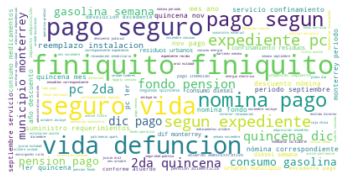

In [39]:
wc = WordCloud(background_color='white')
wc.generate(textos_compras)
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()